In [79]:
import numpy as np
import math
import scipy.linalg

In [91]:
def rowInterchange(A, m, i):
    tmp = np.copy(A[i])
    A[i] = A[m]
    A[m] = tmp

def backSubstitute(A, x):
    sysSize = len(A)
    varSize = len(x)
    for i in reversed(range(sysSize)):
        x[i] = 1 / A[i, i] * (A[i, varSize] - A[i, i + 1:varSize] @ x[i + 1:varSize])


def gaussElimination(A):
    I = np.identity(len(A))
    A = np.array(A)
    # b = np.array(b)
    # A = np.concatenate((A, b), axis=1)
    unique_sol = True
    sysSize = len(A)
    for i in range(sysSize):
        for k in range(i + 1, sysSize):
            m_ki = A[k, i] / A[i, i]
            A[k] = A[k] - m_ki * A[i]
            I[k] = I[k] - m_ki * I[i]
    if not unique_sol:
        if (A[sysSize - 1] == np.array([0] * (sysSize + 1))).all():
            return "Infinite Solution"
        else:
            return "No solution"
    return A, I
    

def gaussJordanForInverse(A: np.ndarray) -> np.ndarray:
    res = gaussElimination(A)
    if type(res) == str:
        return "Cannot change to inversed matrix"
    
    eA, I = res
    for i in range(len(A) - 1, -1, -1):
        tmp = eA[i, i]
        I[i] = I[i] / tmp
        eA[i] = eA[i] / tmp
        for j in range(i):
            I[j] -= eA[j, i] * I[i]
            eA[j] -= eA[j, i] * eA[i]
    return I


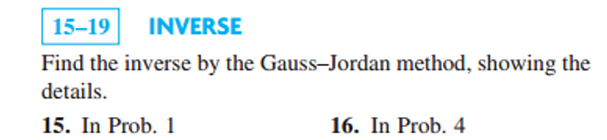

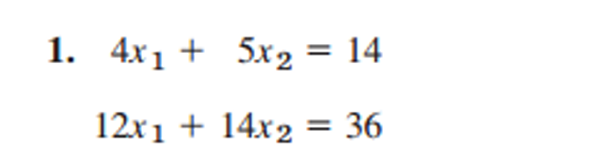

In [92]:
A = [[ 4,    5],
     [12,   14],]

b = [[  14.],
     [  36.]]

print(gaussJordanForInverse(A))
print(scipy.linalg.inv(A))

[[-3.5   1.25]
 [ 3.   -1.  ]]
[[-3.5   1.25]
 [ 3.   -1.  ]]
